# Maze Building

The purpose of this notebook is to explain how the functions in `maze_functions.py` construct a maze using the [union-find/disjoint-set data structure](https://en.wikipedia.org/wiki/Disjoint-set_data_structure).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import maze_functions

%matplotlib inline

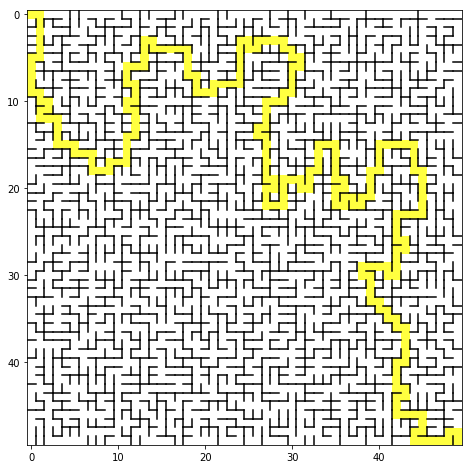

In [3]:
maze = maze_functions.Maze(n_cols = 50, n_rows = 50, seed = 48)

plt.figure(figsize = [8, 8])
maze.plot(with_solution = True)

In [1]:
blah = (1, 2, 3, 4)
for b in blah:
    print(b)

1
2
3
4
